In [1]:
import pandas as pd 
import matplotlib.pyplot as plt # Visualization

In [2]:
from sklearn.preprocessing import StandardScaler # Preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression # Considered best for prediction
from sklearn.svm import SVC 
import seaborn as sns # Visualization

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [4]:
data = pd.read_csv('tested.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
data1=data.drop(['Cabin', 'Name','Ticket', 'Fare'], axis=1) # axis=1 denotes column

In [6]:
data1.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Sex            False
Age             True
SibSp          False
Parch          False
Embarked       False
dtype: bool

# Data Preprocessing

In [7]:
# Imputation is done, deletion could also be done but deletion causes loss of huge volume of data.
def missing_value(data,col_data):
    data1[col_data] = data1[col_data].fillna(data[col_data].mean())
missing_value(data,'Age')
#missing_value(data, 'Fare')
#missing_value(data,'Cabin')
data1.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Embarked       False
dtype: bool

In [8]:
# converting categorical Columns

data1.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True) # The first one is nornal encoding and the 2nd one is One Hot Encoding.

In [9]:
data1.describe() # Gives the summary of the dataframe

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,0.363636,30.272590,0.447368,0.392344,0.464115
std,120.810458,0.481622,0.841838,0.481622,12.634534,0.896760,0.981429,0.685516
min,892.000000,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,0.000000,23.000000,0.000000,0.000000,0.000000
50%,1100.500000,0.000000,3.000000,0.000000,30.272590,0.000000,0.000000,0.000000
75%,1204.750000,1.000000,3.000000,1.000000,35.750000,1.000000,0.000000,1.000000
max,1309.000000,1.000000,3.000000,1.000000,76.000000,8.000000,9.000000,2.000000


In [10]:
corrM = data1.corr() # Till here we are basically knowing the data
corrM

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
PassengerId,1.000000,-0.023245,-0.026751,-0.023245,-0.030874,0.003818,0.043080,-0.049863
Survived,-0.023245,1.000000,-0.108615,1.000000,-0.000011,0.099943,0.159120,0.126779
Pclass,-0.026751,-0.108615,1.000000,-0.108615,-0.440782,0.001087,0.018721,0.031096
Sex,-0.023245,1.000000,-0.108615,1.000000,-0.000011,0.099943,0.159120,0.126779
Age,-0.030874,-0.000011,-0.440782,-0.000011,1.000000,-0.079535,-0.045073,0.089751
SibSp,0.003818,0.099943,0.001087,0.099943,-0.079535,1.000000,0.306895,-0.100603
Parch,0.043080,0.159120,0.018721,0.159120,-0.045073,0.306895,1.000000,-0.125164
Embarked,-0.049863,0.126779,0.031096,0.126779,0.089751,-0.100603,-0.125164,1.000000


In [25]:
x = data1.iloc[:,:-1]
y = data1.iloc[:,-1]
x_scaling = StandardScaler().fit_transform(x) # Transforming and standardizing the data
x_train, x_test, y_train, y_test = train_test_split(x_scaling, y, test_size=0.3) # Splitting the data

# Logistic Regression

### Considered best for prediction in case of Supervised Machine Learning

In [57]:
lr=LogisticRegression(max_iter=120,random_state=0, n_jobs=20).fit(x_train, y_train)
y_pred_lr=lr.predict(x_test)
print('acc lr = {}'.format(accuracy_score(y_test,y_pred_lr)*100))
print('Precision lr = {}'.format(precision_score(y_test,y_pred_lr, average='micro')))
print('Recall lr = {}'.format(recall_score(y_test,y_pred_lr, average='micro')))
print('F1 lr = {}'.format(f1_score(y_test,y_pred_lr, average='micro')))
a1=((accuracy_score(y_test,y_pred_lr)*100))

acc lr = 68.25396825396825
Precision lr = 0.6825396825396826
Recall lr = 0.6825396825396826
F1 lr = 0.6825396825396826


<AxesSubplot:>

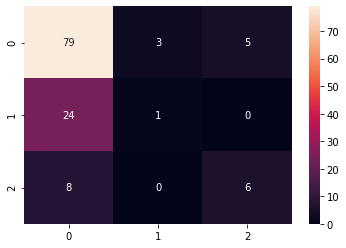

In [58]:
conf = confusion_matrix(y_test,y_pred_lr)
sns.heatmap(conf,annot=True,fmt='d')

# Decision Tree Classifier

In [59]:
dt = DecisionTreeClassifier(max_leaf_nodes=6).fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
print('acc DT = {}'.format(accuracy_score(y_test,y_pred_dt)*100))
print('Precision DT = {}'.format(precision_score(y_test,y_pred_dt, average='micro')))
print('Recall DT = {}'.format(recall_score(y_test,y_pred_dt, average='micro')))
print('F1 DT = {}'.format(f1_score(y_test,y_pred_dt, average='micro')))
a2=((accuracy_score(y_test,y_pred_dt)*100))

acc DT = 74.60317460317461
Precision DT = 0.746031746031746
Recall DT = 0.746031746031746
F1 DT = 0.746031746031746


<AxesSubplot:>

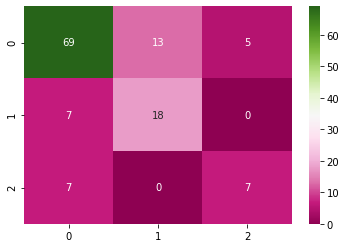

In [60]:
conf = confusion_matrix(y_test,y_pred_dt)
sns.heatmap(conf,annot=True,fmt='d', cmap="PiYG")

# Support Vector Machines

In [61]:
svc_poly = SVC(kernel='poly',degree=6).fit(x_train,y_train)
y_pred_svc_poly = svc_poly.predict(x_test)
print('acc svc poly = {}'.format(accuracy_score(y_test,y_pred_svc_poly)*100))
print('Precision svc poly = {}'.format(precision_score(y_test,y_pred_svc_poly, average='micro')))
print('Recall svc poly = {}'.format(recall_score(y_test,y_pred_svc_poly, average='micro')))
print('f1 svc poly = {}'.format(f1_score(y_test,y_pred_svc_poly, average='micro')))
a3=((accuracy_score(y_test,y_pred_svc_poly)*100))

acc svc poly = 65.87301587301587
Precision svc poly = 0.6587301587301587
Recall svc poly = 0.6587301587301587
f1 svc poly = 0.6587301587301587


<AxesSubplot:>

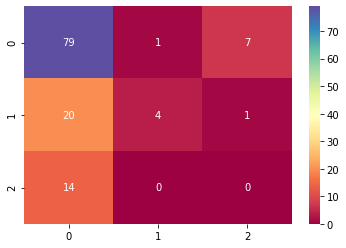

In [62]:
conf = confusion_matrix(y_test,y_pred_svc_poly)
sns.heatmap(conf,annot=True,fmt='d', cmap='Spectral')

# Random Forest Classifier

In [63]:
rf = RandomForestClassifier(criterion='gini',max_depth=10, random_state=0).fit(x_train,y_train)
y_pred_rf = rf.predict(x_test) 
print('acc rf = {}'.format(accuracy_score(y_test,y_pred_rf)*100))
print('Precision rf = {}'.format(precision_score(y_test,y_pred_rf, average='micro')))
print('Recall rf = {}'.format(recall_score(y_test,y_pred_rf, average='micro')))
print('f1 rf = {}'.format(f1_score(y_test,y_pred_rf, average='micro')))
a4=((accuracy_score(y_test,y_pred_rf)*100))

acc rf = 69.84126984126983
Precision rf = 0.6984126984126984
Recall rf = 0.6984126984126984
f1 rf = 0.6984126984126984


<AxesSubplot:>

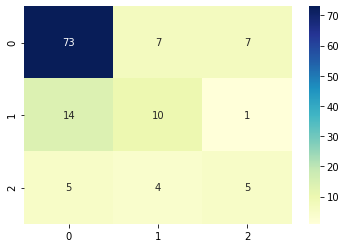

In [64]:
conf = confusion_matrix(y_test,y_pred_rf)
sns.heatmap(conf,annot=True,fmt='d', cmap='YlGnBu')

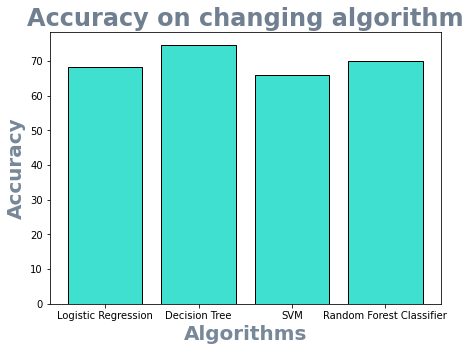

In [65]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
y=['Logistic Regression','Decision Tree','SVM', 'Random Forest Classifier']
 
# getting values against each value of y
x=[a1, a2, a3, a4]
plt.bar(y, x, color='turquoise', edgecolor='black')
 
# setting label of y-axis
plt.ylabel("Accuracy", fontweight='bold', color = 'lightslategray', fontsize='20')
 
# setting label of x-axis
plt.xlabel("Algorithms", fontweight='bold', color = 'lightslategray', fontsize='20')
plt.title("Accuracy on changing algorithm", fontweight='bold', color = 'slategray', fontsize='24')
plt.show()

# Ensembling

### Combining different classifiers into a meta classifier

In [103]:
from sklearn.ensemble import VotingClassifier
clf1=DecisionTreeClassifier()
clf2=SVC()
clf3=RandomForestClassifier()
clf4=LogisticRegression()

eclf1=VotingClassifier(estimators=[('LR', clf1),('Decision Tree Classifier', clf2), ('SVM', clf3), ('RFC', clf4)], voting='hard')
eclf1.fit(x_train, y_train)
predictions=eclf1.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test, predictions)*100)
print("Precision Score:", precision_score(y_test, predictions, average='micro'))
print("Recall:", recall_score(y_test, predictions, average='micro'))
print("f1 score:", f1_score(y_test, predictions, average='micro'))
ape=(accuracy_score(y_test, predictions)*100) # ape= accuracy post ensembling
ppe=(precision_score(y_test, predictions, average='micro'))
rpe=(recall_score(y_test, predictions, average='micro'))
fpe=(f1_score(y_test, predictions, average='micro'))

Accuracy Score: 71.42857142857143
Precision Score: 0.7142857142857143
Recall: 0.7142857142857143
f1 score: 0.7142857142857143


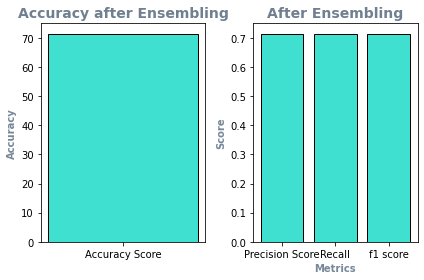

In [123]:
import matplotlib.pyplot as plt

# First plot for Accuracy after ensembling

plt.subplot(1, 2, 1) 
y=['Accuracy Score']
x=[ape]
plt.bar(y, x, color='turquoise', edgecolor='black')
plt.ylabel("Accuracy", fontweight='bold', color = 'lightslategray', fontsize='10')
plt.title("Accuracy after Ensembling", fontweight='bold', color = 'slategray', fontsize='14')


# Second plot for other metrics after ensembling

plt.subplot(1, 2, 2) 
ye=['Precision Score', 'Recall', 'f1 score']
xe=[ppe, rpe, fpe]
plt.bar(ye, xe, color='turquoise', edgecolor='black')
plt.xlabel("Metrics", fontweight='bold', color = 'lightslategray', fontsize='10')
plt.ylabel("Score", fontweight='bold', color = 'lightslategray', fontsize='10')
plt.title("After Ensembling", fontweight='bold', color = 'slategray', fontsize='14')

# space between the plots
plt.tight_layout()
 
# show plot
plt.show()

In [114]:
#import matplotlib.pyplot as plt
#plt.figure(figsize=(7,5))
#y=['Accuracy Score','Precision Score', 'Recall', 'f1 score']
 
# getting values against each value of y
#x=[ape, ppe, rpe, fpe]
#plt.bar(y, x, color='turquoise', edgecolor='black')
 
# setting label of y-axis
#plt.ylabel("Accuracy", fontweight='bold', color = 'lightslategray', fontsize='20')
 
# setting label of x-axis
#plt.xlabel("Classification Algorithms", fontweight='bold', color = 'lightslategray', fontsize='20')
#plt.title("Accuracy after Ensembling", fontweight='bold', color = 'slategray', fontsize='24')
#plt.show()

# Hyperparameter Tuning

## Tuning Logistic Regression

In [124]:
x = data1.iloc[:,:-1]
y = data1.iloc[:,-1]
x_scaling = StandardScaler().fit_transform(x)

### Changing train, test ratio to analyse change in accuracy

In [138]:
x_train, x_test, y_train, y_test = train_test_split(x_scaling, y, test_size=0.2)
lr=LogisticRegression(random_state=0).fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
lracc1=accuracy_score(y_test,y_pred_lr)*100
lracc1

69.04761904761905

In [139]:
x_train, x_test, y_train, y_test = train_test_split(x_scaling, y, test_size=0.3)
lr=LogisticRegression(random_state=0).fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
lracc2=accuracy_score(y_test,y_pred_lr)*100
lracc2

62.698412698412696

In [140]:
x_train, x_test, y_train, y_test = train_test_split(x_scaling, y, test_size=0.4)
lr=LogisticRegression(random_state=0).fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
lracc3=accuracy_score(y_test,y_pred_lr)*100
lracc3

63.095238095238095

In [141]:
x_train, x_test, y_train, y_test = train_test_split(x_scaling, y, test_size=0.5)
lr=LogisticRegression(random_state=0).fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
lracc4=accuracy_score(y_test,y_pred_lr)*100
lracc4

68.89952153110048

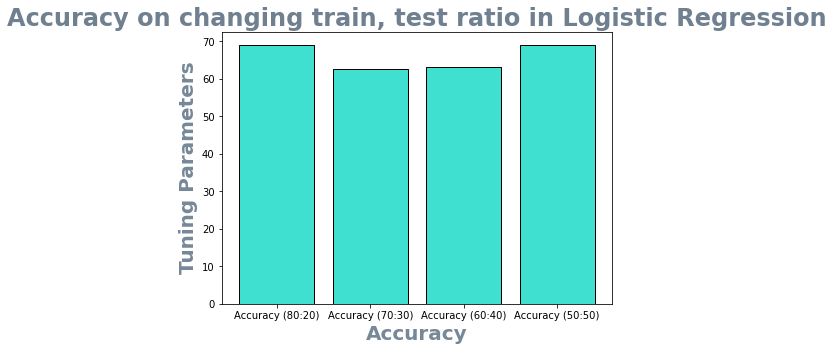

In [143]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
y=['Accuracy (80:20)','Accuracy (70:30)', 'Accuracy (60:40)', 'Accuracy (50:50)']
 
# getting values against each value of y
x=[lracc1, lracc2, lracc3, lracc4]
plt.bar(y, x, color='turquoise', edgecolor='black')
 
# setting label of y-axis
plt.ylabel("Tuning Parameters", fontweight='bold', color = 'lightslategray', fontsize='20')
 
# setting label of x-axis
plt.xlabel("Accuracy", fontweight='bold', color = 'lightslategray', fontsize='20')
plt.title("Accuracy on changing train, test ratio in Logistic Regression", fontweight='bold', color = 'slategray', fontsize='24')
plt.show()

## Tuning Decision Tree

In [239]:
x = data1.iloc[:,:-1]
y = data1.iloc[:,-1]
x_scaling = StandardScaler().fit_transform(x)

### Changing train, test ratio to analyse change in accuracy

In [240]:
x_train, x_test, y_train, y_test = train_test_split(x_scaling, y, test_size=0.2)
t1=DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0).fit(x_train,y_train)
y_pred_t1 = t1.predict(x_test)
dtacc1=accuracy_score(y_test,y_pred_t1)*100
dtacc1

66.66666666666666

In [241]:
x_train, x_test, y_train, y_test = train_test_split(x_scaling, y, test_size=0.3)
t2=DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0).fit(x_train,y_train)
y_pred_t2 = t2.predict(x_test)
dtacc2=accuracy_score(y_test,y_pred_t2)*100
dtacc2

68.25396825396825

In [242]:
x_train, x_test, y_train, y_test = train_test_split(x_scaling, y, test_size=0.4)
t3=DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0).fit(x_train,y_train)
y_pred_t3 = t3.predict(x_test)
dtacc3=accuracy_score(y_test,y_pred_t3)*100
dtacc3

62.5

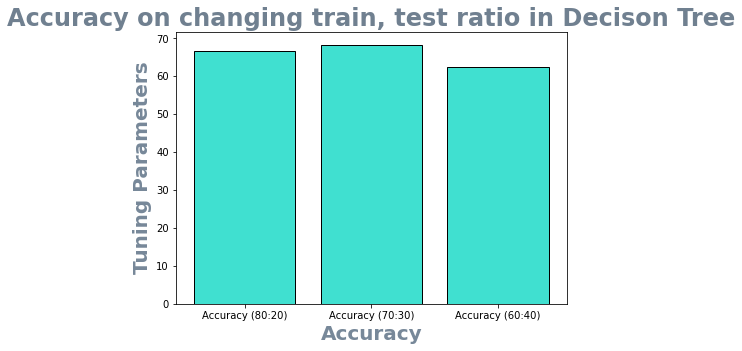

In [243]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
y=['Accuracy (80:20)','Accuracy (70:30)', 'Accuracy (60:40)']
 
# getting values against each value of y
x=[dtacc1, dtacc2, dtacc3]
plt.bar(y, x, color='turquoise', edgecolor='black')
 
# setting label of y-axis
plt.ylabel("Tuning Parameters", fontweight='bold', color = 'lightslategray', fontsize='20')
 
# setting label of x-axis
plt.xlabel("Accuracy", fontweight='bold', color = 'lightslategray', fontsize='20')
plt.title("Accuracy on changing train, test ratio in Decison Tree", fontweight='bold', color = 'slategray', fontsize='24')
plt.show()

### Changing the parameter: criterion- entropy, gini

In [244]:
x = data1.iloc[:,:-1]
y = data1.iloc[:,-1]
x_scaling = StandardScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaling, y, test_size=0.3)

In [245]:
hp1=DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0).fit(x_train,y_train)
y_pred_hp1 = hp1.predict(x_test)
print('Accuracy using ID3 = {}'.format(accuracy_score(y_test,y_pred_hp1)*100))

Accuracy using ID3 = 59.523809523809526


In [246]:
hp2=DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0).fit(x_train,y_train)
y_pred_hp2 = dt.predict(x_test)
print('Accuracy using CART = {}'.format(accuracy_score(y_test,y_pred_hp2)*100))

Accuracy using CART = 62.698412698412696


### Changing the parameter: splitter-best, random

In [247]:
hp3=DecisionTreeClassifier(criterion='entropy',splitter='best', max_depth=3, random_state=0).fit(x_train,y_train)
y_pred_hp3 = hp3.predict(x_test)
print('Accuracy using ID3 with best splitter = {}'.format(accuracy_score(y_test,y_pred_hp3)*100))

Accuracy using ID3 with best splitter = 59.523809523809526


In [248]:
hp4=DecisionTreeClassifier(criterion='entropy',splitter='random', max_depth=3, random_state=0).fit(x_train,y_train)
y_pred_hp4 = hp4.predict(x_test)
print('Accuracy using ID3 with random splitter = {}'.format(accuracy_score(y_test,y_pred_hp4)*100))

Accuracy using ID3 with random splitter = 61.904761904761905


In [249]:
hp5=DecisionTreeClassifier(criterion='gini',splitter='best', max_depth=3, random_state=0).fit(x_train,y_train)
y_pred_hp5 = hp5.predict(x_test)
print('Accuracy using CART with best splitter  = {}'.format(accuracy_score(y_test,y_pred_hp5)*100))

Accuracy using CART with best splitter  = 59.523809523809526


In [250]:
hp6=DecisionTreeClassifier(criterion='gini',splitter='random', max_depth=3, random_state=0).fit(x_train,y_train)
y_pred_hp6 = hp6.predict(x_test)
print('Accuracy using CART with random splitter  = {}'.format(accuracy_score(y_test,y_pred_hp6)*100))

Accuracy using CART with random splitter  = 61.904761904761905


### Changing the parameter: max_depth

In [251]:
hp7=DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0).fit(x_train,y_train)
y_pred_hp7 = hp7.predict(x_test)
print('Accuracy using ID3 with max_depth 4 = {}'.format(accuracy_score(y_test,y_pred_hp7)*100))

Accuracy using ID3 with max_depth 4 = 55.55555555555556


In [252]:
hp8=DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0).fit(x_train,y_train)
y_pred_hp8 = hp8.predict(x_test)
print('Accuracy using ID3 with max_depth 5 = {}'.format(accuracy_score(y_test,y_pred_hp8)*100))

Accuracy using ID3 with max_depth 5 = 61.904761904761905


In [253]:
hp9=DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0).fit(x_train,y_train)
y_pred_hp9 = hp9.predict(x_test)
print('Accuracy using ID3 with max_depth 6 = {}'.format(accuracy_score(y_test,y_pred_hp9)*100))

Accuracy using ID3 with max_depth 6 = 52.38095238095239


In [254]:
hp10=DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0).fit(x_train,y_train)
y_pred_hp10 = hp10.predict(x_test)
print('Accuracy using CART with max_depth 4 = {}'.format(accuracy_score(y_test,y_pred_hp10)*100))

Accuracy using CART with max_depth 4 = 54.761904761904766


In [255]:
hp11=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0).fit(x_train,y_train)
y_pred_hp11 = hp11.predict(x_test)
print('Accuracy using CART with max_depth 5 = {}'.format(accuracy_score(y_test,y_pred_hp11)*100))

Accuracy using CART with max_depth 5 = 59.523809523809526


In [256]:
hp12=DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=0).fit(x_train,y_train)
y_pred_hp12 = hp12.predict(x_test)
print('Accuracy using CART with max_depth 6 = {}'.format(accuracy_score(y_test,y_pred_hp12)*100))

Accuracy using CART with max_depth 6 = 57.14285714285714


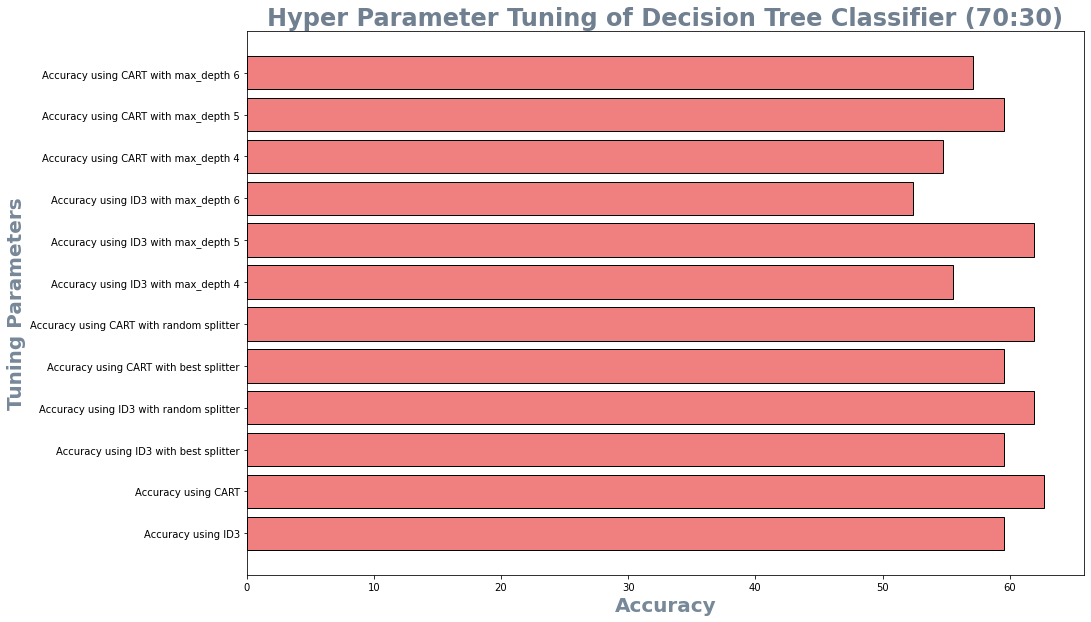

In [258]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
y=['Accuracy using ID3',
   'Accuracy using CART',
   'Accuracy using ID3 with best splitter',
   'Accuracy using ID3 with random splitter',
   'Accuracy using CART with best splitter',
   'Accuracy using CART with random splitter',
   'Accuracy using ID3 with max_depth 4',
   'Accuracy using ID3 with max_depth 5',
   'Accuracy using ID3 with max_depth 6',
   'Accuracy using CART with max_depth 4',
   'Accuracy using CART with max_depth 5',
   'Accuracy using CART with max_depth 6']
 
# getting values against each value of y
x=[accuracy_score(y_test,y_pred_hp1)*100,
  accuracy_score(y_test,y_pred_hp2)*100,
  accuracy_score(y_test,y_pred_hp3)*100,
  accuracy_score(y_test,y_pred_hp4)*100,
  accuracy_score(y_test,y_pred_hp5)*100,
  accuracy_score(y_test,y_pred_hp6)*100,
  accuracy_score(y_test,y_pred_hp7)*100,
  accuracy_score(y_test,y_pred_hp8)*100,
  accuracy_score(y_test,y_pred_hp9)*100,
  accuracy_score(y_test,y_pred_hp10)*100,
  accuracy_score(y_test,y_pred_hp11)*100,
  accuracy_score(y_test,y_pred_hp12)*100]
plt.barh(y, x, color='lightcoral', edgecolor='black')
 
# setting label of y-axis
plt.ylabel("Tuning Parameters", fontweight='bold', color = 'lightslategray', fontsize='20')
 
# setting label of x-axis
plt.xlabel("Accuracy", fontweight='bold', color = 'lightslategray', fontsize='20')
plt.title("Hyper Parameter Tuning of Decision Tree Classifier (70:30)", fontweight='bold', color = 'slategray', fontsize='24')
plt.show()

## Tuning Support Vector Machine

In [259]:
x = data1.iloc[:,:-1]
y = data1.iloc[:,-1]
x_scaling = StandardScaler().fit_transform(x)

### Changing the train, test ratio to analyse accuracy

In [260]:
x_train, x_test, y_train, y_test = train_test_split(x_scaling, y, test_size=0.2)
svc_rbf = SVC(kernel='rbf',degree=6).fit(x_train,y_train)
y_pred_svc_rbf = svc_rbf.predict(x_test)
svm1=accuracy_score(y_test,y_pred_svc_rbf)
acc1=svm1*100
acc1

61.904761904761905

In [261]:
x_train, x_test, y_train, y_test = train_test_split(x_scaling, y, test_size=0.3)
svc_rbf = SVC(kernel='rbf',degree=6).fit(x_train,y_train)
y_pred_svc_rbf = svc_rbf.predict(x_test)
svm2=accuracy_score(y_test,y_pred_svc_rbf)
acc2=svm2*100
acc2

65.07936507936508

In [262]:
x_train, x_test, y_train, y_test = train_test_split(x_scaling, y, test_size=0.4)
svc_rbf = SVC(kernel='rbf',degree=6).fit(x_train,y_train)
y_pred_svc_rbf = svc_rbf.predict(x_test)
svm3=accuracy_score(y_test,y_pred_svc_rbf)
acc3=svm3*100
acc3

64.28571428571429

In [263]:
x_train, x_test, y_train, y_test = train_test_split(x_scaling, y, test_size=0.5)
svc_rbf = SVC(kernel='rbf',degree=6).fit(x_train,y_train)
y_pred_svc_rbf = svc_rbf.predict(x_test)
svm4=accuracy_score(y_test,y_pred_svc_rbf)
acc4=svm4*100
acc4

68.42105263157895

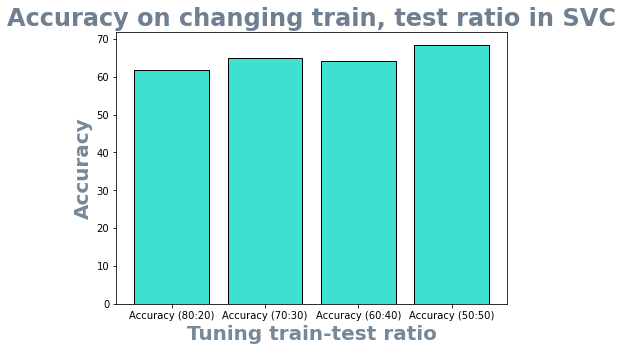

In [265]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
y=['Accuracy (80:20)','Accuracy (70:30)', 'Accuracy (60:40)', 'Accuracy (50:50)']
 
# getting values against each value of y
x=[acc1, acc2, acc3, acc4]
plt.bar(y, x, color='turquoise', edgecolor='black')
 
# setting label of y-axis
plt.ylabel("Accuracy", fontweight='bold', color = 'lightslategray', fontsize='20')
 
# setting label of x-axis
plt.xlabel("Tuning train-test ratio", fontweight='bold', color = 'lightslategray', fontsize='20')
plt.title("Accuracy on changing train, test ratio in SVC", fontweight='bold', color = 'slategray', fontsize='24')
plt.show()

### Changing Kernels - rbf, poly, linear, sigmoid

In [266]:
x = data1.iloc[:,:-1]
y = data1.iloc[:,-1]
x_scaling = StandardScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaling, y, test_size=0.33)

In [267]:
svc_rbf = SVC(kernel='rbf',degree=6).fit(x_train,y_train)
y_pred_svc_rbf = svc_rbf.predict(x_test)
print('acc svc rbf = {}'.format(accuracy_score(y_test,y_pred_svc_rbf)*100))

acc svc rbf = 68.11594202898551


In [268]:
svc_poly = SVC(kernel='poly',degree=6).fit(x_train,y_train)
y_pred_svc_poly = svc_poly.predict(x_test)
print('acc svc poly = {}'.format(accuracy_score(y_test,y_pred_svc_poly)*100))

acc svc poly = 65.94202898550725


In [269]:
svc_linear = SVC(kernel='linear',degree=6).fit(x_train,y_train)
y_pred_svc_linear = svc_linear.predict(x_test)
print('acc svc linear = {}'.format(accuracy_score(y_test,y_pred_svc_linear)*100))

acc svc linear = 69.56521739130434


In [270]:
svc_sigmoid = SVC(kernel='sigmoid',degree=6).fit(x_train,y_train)
y_pred_svc_sigmoid = svc_sigmoid.predict(x_test)
print('acc svc sigmoid = {}'.format(accuracy_score(y_test,y_pred_svc_sigmoid)*100))

acc svc sigmoid = 54.347826086956516


### Changing degree of poly kernel

In [271]:
svc_poly_d3 = SVC(kernel='poly',degree=3).fit(x_train,y_train)
y_pred_svc_poly_d3 = svc_poly_d3.predict(x_test)
print('acc svc poly degree 3 = {}'.format(accuracy_score(y_test,y_pred_svc_poly_d3)*100))

acc svc poly degree 3 = 66.66666666666666


In [272]:
svc_poly_d4 = SVC(kernel='poly',degree=4).fit(x_train,y_train)
y_pred_svc_poly_d4 = svc_poly_d4.predict(x_test)
print('acc svc poly degree 4 = {}'.format(accuracy_score(y_test,y_pred_svc_poly_d4)*100))

acc svc poly degree 4 = 65.94202898550725


In [273]:
svc_poly_d5 = SVC(kernel='poly',degree=5).fit(x_train,y_train)
y_pred_svc_poly_d5 = svc_poly_d5.predict(x_test)
print('acc svc poly degree 5 = {}'.format(accuracy_score(y_test,y_pred_svc_poly_d5)*100))

acc svc poly degree 5 = 64.4927536231884


In [274]:
svc_poly_d6 = SVC(kernel='poly',degree=6).fit(x_train,y_train)
y_pred_svc_poly_d6 = svc_poly_d6.predict(x_test)
print('acc svc poly degree 6 = {}'.format(accuracy_score(y_test,y_pred_svc_poly_d6)*100))

acc svc poly degree 6 = 65.94202898550725


In [275]:
svc_poly_d7 = SVC(kernel='poly',degree=7).fit(x_train,y_train)
y_pred_svc_poly_d7 = svc_poly_d7.predict(x_test)
print('acc svc poly degree 7 = {}'.format(accuracy_score(y_test,y_pred_svc_poly_d7)*100))

acc svc poly degree 7 = 63.76811594202898


In [276]:
svc_poly_d8 = SVC(kernel='poly',degree=8).fit(x_train,y_train)
y_pred_svc_poly_d8 = svc_poly_d8.predict(x_test)
print('acc svc poly degree 8 = {}'.format(accuracy_score(y_test,y_pred_svc_poly_d8)*100))

acc svc poly degree 8 = 64.4927536231884


In [277]:
svc_poly_d9 = SVC(kernel='poly',degree=9).fit(x_train,y_train)
y_pred_svc_poly_d9 = svc_poly_d9.predict(x_test)
print('acc svc poly degree 9 = {}'.format(accuracy_score(y_test,y_pred_svc_poly_d9)*100))

acc svc poly degree 9 = 64.4927536231884


### Changing degree of rbf kernel

In [278]:
svc_rbf_d4 = SVC(kernel='rbf',degree=4).fit(x_train,y_train)
y_pred_svc_rbf_d4 = svc_rbf_d4.predict(x_test)
print('acc svc rbf with degree 4 = {}'.format(accuracy_score(y_test,y_pred_svc_rbf_d4)*100))

acc svc rbf with degree 4 = 68.11594202898551


In [279]:
svc_rbf_d5 = SVC(kernel='rbf',degree=5).fit(x_train,y_train)
y_pred_svc_rbf_d5 = svc_rbf_d5.predict(x_test)
print('acc svc rbf with degree 5 = {}'.format(accuracy_score(y_test,y_pred_svc_rbf_d5)*100))

acc svc rbf with degree 5 = 68.11594202898551


In [280]:
svc_rbf_d6 = SVC(kernel='rbf',degree=6).fit(x_train,y_train)
y_pred_svc_rbf_d6 = svc_rbf_d6.predict(x_test)
print('acc svc rbf with degree 6 = {}'.format(accuracy_score(y_test,y_pred_svc_rbf_d6)*100))

acc svc rbf with degree 6 = 68.11594202898551


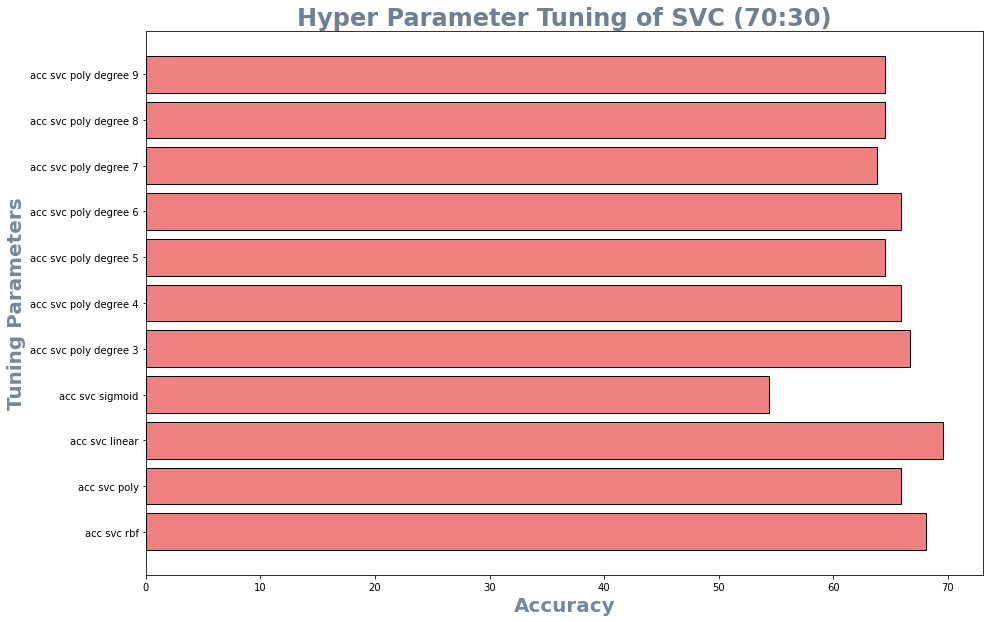

In [282]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
y=['acc svc rbf',
   'acc svc poly',
   'acc svc linear',
   'acc svc sigmoid',
   'acc svc poly degree 3',
   'acc svc poly degree 4',
   'acc svc poly degree 5',
   'acc svc poly degree 6',
   'acc svc poly degree 7',
   'acc svc poly degree 8',
   'acc svc poly degree 9'
  ]
 
# getting values against each value of y
x=[accuracy_score(y_test,y_pred_svc_rbf)*100,
   accuracy_score(y_test,y_pred_svc_poly)*100,
   accuracy_score(y_test,y_pred_svc_linear)*100,
   accuracy_score(y_test,y_pred_svc_sigmoid)*100,
   accuracy_score(y_test,y_pred_svc_poly_d3)*100,
   accuracy_score(y_test,y_pred_svc_poly_d4)*100,
   accuracy_score(y_test,y_pred_svc_poly_d5)*100,
   accuracy_score(y_test,y_pred_svc_poly_d6)*100,
   accuracy_score(y_test,y_pred_svc_poly_d7)*100,
   accuracy_score(y_test,y_pred_svc_poly_d8)*100,
   accuracy_score(y_test,y_pred_svc_poly_d9)*100
  ]
plt.barh(y, x, color='lightcoral', edgecolor='black')
 
# setting label of y-axis
plt.ylabel("Tuning Parameters", fontweight='bold', color = 'lightslategray', fontsize='20')
 
# setting label of x-axis
plt.xlabel("Accuracy", fontweight='bold', color = 'lightslategray', fontsize='20')
plt.title("Hyper Parameter Tuning of SVC (70:30)", fontweight='bold', color = 'slategray', fontsize='24')
plt.show()

## Tuning Random Forest Classifier

### Changing train, test ratio and observing the change in accuracy

In [283]:
x = data1.iloc[:,:-1]
y = data1.iloc[:,-1]
x_scaling = StandardScaler().fit_transform(x)

In [284]:
x_train, x_test, y_train, y_test = train_test_split(x_scaling, y, test_size=0.2)
rf = RandomForestClassifier(criterion='gini',max_depth=10, random_state=0).fit(x_train,y_train)
y_pred_rf = rf.predict(x_test) 
rfacc1=accuracy_score(y_test,y_pred_rf)*100
rfacc1

64.28571428571429

In [285]:
x_train, x_test, y_train, y_test = train_test_split(x_scaling, y, test_size=0.3)
rf = RandomForestClassifier(criterion='gini',max_depth=10, random_state=0).fit(x_train,y_train)
y_pred_rf = rf.predict(x_test) 
rfacc2=accuracy_score(y_test,y_pred_rf)*100
rfacc2

64.28571428571429

In [286]:
x_train, x_test, y_train, y_test = train_test_split(x_scaling, y, test_size=0.4)
rf = RandomForestClassifier(criterion='gini',max_depth=10, random_state=0).fit(x_train,y_train)
y_pred_rf = rf.predict(x_test) 
rfacc3=accuracy_score(y_test,y_pred_rf)*100
rfacc3

68.45238095238095

In [287]:
x_train, x_test, y_train, y_test = train_test_split(x_scaling, y, test_size=0.5)
rf = RandomForestClassifier(criterion='gini',max_depth=10, random_state=0).fit(x_train,y_train)
y_pred_rf = rf.predict(x_test) 
rfacc4=accuracy_score(y_test,y_pred_rf)*100
rfacc4

62.67942583732058

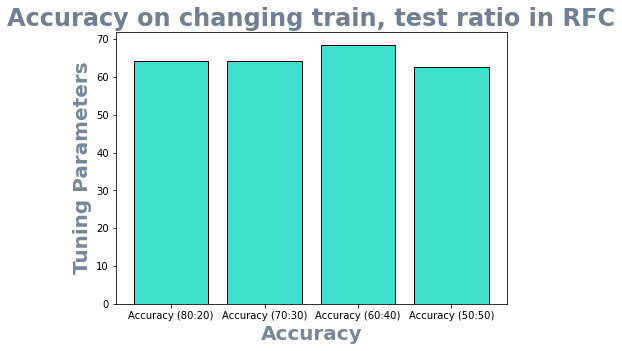

In [288]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
y=['Accuracy (80:20)','Accuracy (70:30)', 'Accuracy (60:40)', 'Accuracy (50:50)']
 
# getting values against each value of y
x=[rfacc1, rfacc2, rfacc3, rfacc4]
plt.bar(y, x, color='turquoise', edgecolor='black')
 
# setting label of y-axis
plt.ylabel("Tuning Parameters", fontweight='bold', color = 'lightslategray', fontsize='20')
 
# setting label of x-axis
plt.xlabel("Accuracy", fontweight='bold', color = 'lightslategray', fontsize='20')
plt.title("Accuracy on changing train, test ratio in RFC", fontweight='bold', color = 'slategray', fontsize='24')
plt.show()

### Changing the parameters to observe its effect on accuracy of the model

In [289]:
x = data1.iloc[:,:-1]
y = data1.iloc[:,-1]
x_scaling = StandardScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaling, y, test_size=0.3)

#### Changing the criterion parameter: gini and entropy

In [290]:
rf = RandomForestClassifier(criterion='gini',max_depth=10, random_state=0).fit(x_train,y_train)
y_pred_rf1 = rf.predict(x_test) 
print('acc rf with criterion: gini index = {}'.format(accuracy_score(y_test,y_pred_rf1)*100))

acc rf with criterion: gini index = 65.87301587301587


In [291]:
rf = RandomForestClassifier(criterion='entropy',max_depth=10, random_state=0).fit(x_train,y_train)
y_pred_rf2 = rf.predict(x_test) 
print('acc rf with criterion: entropy = {}'.format(accuracy_score(y_test,y_pred_rf2)*100))

acc rf with criterion: entropy = 67.46031746031747


#### Changing the max depth of the tree and analysing the accuracy

In [292]:
rf = RandomForestClassifier(criterion='gini',max_depth=15, random_state=0).fit(x_train,y_train)
y_pred_rf3 = rf.predict(x_test) 
print('acc rf with gini and depth:15 = {}'.format(accuracy_score(y_test,y_pred_rf3)*100))

acc rf with gini and depth:15 = 67.46031746031747


In [293]:
rf = RandomForestClassifier(criterion='gini',max_depth=20, random_state=0).fit(x_train,y_train)
y_pred_rf4 = rf.predict(x_test) 
print('acc rf with gini and depth: 20 = {}'.format(accuracy_score(y_test,y_pred_rf4)*100))

acc rf with gini and depth: 20 = 68.25396825396825


In [294]:
rf = RandomForestClassifier(criterion='gini',max_depth=25, random_state=0).fit(x_train,y_train)
y_pred_rf5 = rf.predict(x_test) 
print('acc rf with gini and depth: 25 = {}'.format(accuracy_score(y_test,y_pred_rf5)*100))

acc rf with gini and depth: 25 = 68.25396825396825


In [295]:
rf = RandomForestClassifier(criterion='gini',max_depth=30, random_state=0).fit(x_train,y_train)
y_pred_rf6 = rf.predict(x_test) 
print('acc rf with gini and depth: 30 = {}'.format(accuracy_score(y_test,y_pred_rf6)*100))

acc rf with gini and depth: 30 = 68.25396825396825


In [296]:
rf = RandomForestClassifier(criterion='entropy',max_depth=35, random_state=0).fit(x_train,y_train)
y_pred_rf7 = rf.predict(x_test) 
print('acc rf with gini and depth: 35 = {}'.format(accuracy_score(y_test,y_pred_rf7)*100))

acc rf with gini and depth: 35 = 67.46031746031747


In [297]:
rf = RandomForestClassifier(criterion='entropy',max_depth=15, random_state=0).fit(x_train,y_train)
y_pred_rf8 = rf.predict(x_test) 
print('acc rf with entropy and depth:15 = {}'.format(accuracy_score(y_test,y_pred_rf8)*100))

acc rf with entropy and depth:15 = 67.46031746031747


In [298]:
rf = RandomForestClassifier(criterion='entropy',max_depth=20, random_state=0).fit(x_train,y_train)
y_pred_rf9 = rf.predict(x_test) 
print('acc rf with entropy and depth: 20 = {}'.format(accuracy_score(y_test,y_pred_rf9)*100))

acc rf with entropy and depth: 20 = 67.46031746031747


In [299]:
rf = RandomForestClassifier(criterion='entropy',max_depth=25, random_state=0).fit(x_train,y_train)
y_pred_rf10 = rf.predict(x_test) 
print('acc rf with entropy and depth: 25 = {}'.format(accuracy_score(y_test,y_pred_rf10)*100))

acc rf with entropy and depth: 25 = 67.46031746031747


In [300]:
rf = RandomForestClassifier(criterion='entropy',max_depth=30, random_state=0).fit(x_train,y_train)
y_pred_rf11 = rf.predict(x_test) 
print('acc rf with entropy and depth: 30 = {}'.format(accuracy_score(y_test,y_pred_rf11)*100))

acc rf with entropy and depth: 30 = 67.46031746031747


In [301]:
rf = RandomForestClassifier(criterion='entropy',max_depth=35, random_state=0).fit(x_train,y_train)
y_pred_rf12 = rf.predict(x_test) 
print('acc rf with entropy and depth: 35 = {}'.format(accuracy_score(y_test,y_pred_rf12)*100))

acc rf with entropy and depth: 35 = 67.46031746031747


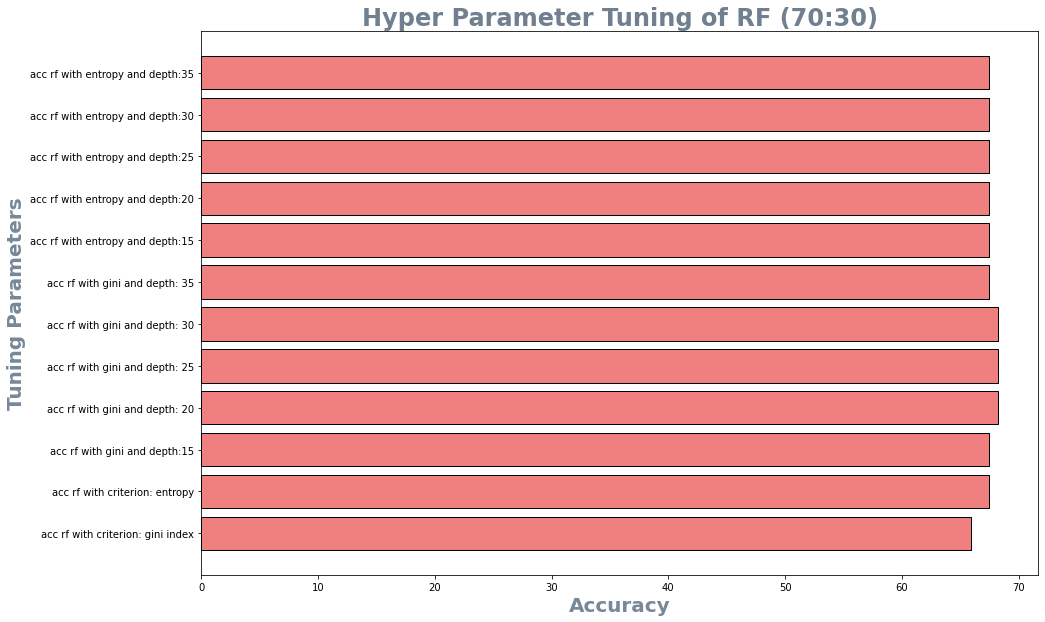

In [302]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
y=['acc rf with criterion: gini index',
   'acc rf with criterion: entropy',
   'acc rf with gini and depth:15',
   'acc rf with gini and depth: 20',
   'acc rf with gini and depth: 25',
   'acc rf with gini and depth: 30',
   'acc rf with gini and depth: 35',
   'acc rf with entropy and depth:15',
   'acc rf with entropy and depth:20',
   'acc rf with entropy and depth:25',
   'acc rf with entropy and depth:30',
   'acc rf with entropy and depth:35'
  ]
 
# getting values against each value of y
x=[accuracy_score(y_test,y_pred_rf1)*100,
   accuracy_score(y_test,y_pred_rf2)*100,
   accuracy_score(y_test,y_pred_rf3)*100,
   accuracy_score(y_test,y_pred_rf4)*100,
   accuracy_score(y_test,y_pred_rf5)*100,
   accuracy_score(y_test,y_pred_rf6)*100,
   accuracy_score(y_test,y_pred_rf7)*100,
   accuracy_score(y_test,y_pred_rf8)*100,
   accuracy_score(y_test,y_pred_rf9)*100,
   accuracy_score(y_test,y_pred_rf10)*100,
   accuracy_score(y_test,y_pred_rf11)*100,
   accuracy_score(y_test,y_pred_rf12)*100
  ]
plt.barh(y, x, color='lightcoral', edgecolor='black')
 
# setting label of y-axis
plt.ylabel("Tuning Parameters", fontweight='bold', color = 'lightslategray', fontsize='20')
 
# setting label of x-axis
plt.xlabel("Accuracy", fontweight='bold', color = 'lightslategray', fontsize='20')
plt.title("Hyper Parameter Tuning of RF (70:30)", fontweight='bold', color = 'slategray', fontsize='24')
plt.show()